# Perceptron Implementation for Cancer Classification Report

## 1. Data Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


### 1.1 Data Loading
We start by loading the dataset using pandas and inspect a sample of 10 records.


In [2]:
data = pd.read_csv("cancer.csv")
print(data.head(10))
data.shape
data

    feature_1   feature_2    feature_3  feature_4   feature_5  feature_6  \
0  206.115242  -32.279256 -1452.954573  -1.747738  137.824509  14.058774   
1  372.027760  -25.477827 -1518.931187  -1.855049  223.125661   7.401536   
2  153.019599  -38.152613  2036.319880  -1.380383  394.355359 -27.784041   
3  281.303306  104.637616 -1847.145726  -0.936068   68.511473  -9.322023   
4  100.423202  -39.101964  -601.026667  -1.339580   97.804870  10.473588   
5   -9.208564  -88.581030  -124.489827   0.709207  181.923238   6.066601   
6  277.378926  -29.977378 -3175.420924  -1.229006    7.815279  32.426973   
7  154.153614  -66.164673 -1095.163743  -2.735912  -93.729569  34.725685   
8  -76.343100   20.790920   287.035084   1.275995  -97.496248  -4.344624   
9   90.084791   47.870423  -762.454270  -1.378897    6.789393  -0.171903   

   feature_7  cancer_form  
0 -10.288917            1  
1  10.971335            1  
2   1.717984            1  
3   6.757695            1  
4 -10.982093           

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,cancer_form
0,206.115242,-32.279256,-1452.954573,-1.747738,137.824509,14.058774,-10.288917,1
1,372.027760,-25.477827,-1518.931187,-1.855049,223.125661,7.401536,10.971335,1
2,153.019599,-38.152613,2036.319880,-1.380383,394.355359,-27.784041,1.717984,1
3,281.303306,104.637616,-1847.145726,-0.936068,68.511473,-9.322023,6.757695,1
4,100.423202,-39.101964,-601.026667,-1.339580,97.804870,10.473588,-10.982093,1
...,...,...,...,...,...,...,...,...
9995,115.953662,87.939420,-1778.023697,0.713350,-282.270218,9.451011,31.390854,0
9996,35.785956,11.034683,-1232.313944,1.298911,-17.431758,4.119594,8.148060,0
9997,201.248524,63.923851,-2600.911112,0.082847,-127.289913,13.274309,16.368725,0
9998,-291.370839,-121.351518,-935.509916,1.326351,-148.200504,38.068770,-29.510733,0


as we can see have p= 7 feature(columns)s, and our target variable y= cancer_form, and we have 10000 samples (rows)

### 1.2 Data Splitting
We split the dataset into training, validation, and testing sets to perform the following tasks:

1. **Training Set:** The data that the model learns from.

2. **Validation Set:** The data that fine-tunes the model and optimize the hyperparameters.

3. **Testing Set:** The data used to evaluate the final model's performance.answers the question of "how well our model is at generalizing?"



In [3]:
# Extract features and target variable
# for X we # select all rows and columns except the last one which contains the target variable
# for y we only select the target variable
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values
# 2. Split the data set into a training set, a validation set, and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, random_state=13)
#we should alwyas check the shape(the number of rows and columns of a given DataFrame)
print('The training set shape:', X_train.shape, y_train.shape)
print('The testing  set shape:', X_test.shape, y_test.shape)


The training set shape: (7500, 7) (7500,)
The testing  set shape: (2500, 7) (2500,)


In the line `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=13)`, we are performing the following operations:

- `X` and `y` are the feature matrix and target variable.
  
- `test_size=0.25` indicates that 25% of the data will be used for testing, and the remaining 75% for training.

- `shuffle=True` specifies that the data should be randomly shuffled before splitting.

- `random_state=13` ensures that the same random split will be generated if the code is run again => reproducibility


### 1.3 Extracting the validation set

In [4]:
# Step 3: Extract a validation set from the training set
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, shuffle = True)
X_train_.shape, X_val.shape, y_train_.shape, y_val.shape
print('The training set shape:', X_train_.shape, y_train_.shape)
print('The testing  set shape:', X_val.shape, y_val.shape)

The training set shape: (5625, 7) (5625,)
The testing  set shape: (1875, 7) (1875,)


### 1.4 Feature Scaling


The dataset splitting process demonstrates the importance of checking the shape of the data partitions. Here's how we derived the shapes:

- For the original split:
  - `X_train.shape`: 7500 samples (75% of the original data = 10000 row * 75%) with 13 features.
  - `X_test.shape`: 2500 samples (25% of the original data) with 13 features.
  - `y_train.shape`: 7500 target values.
  - `y_test.shape`: 2500 target values.

- For the validation set, derived from the training set:
  - `X_train_.shape`: 5625 samples (75% of the training data = (10000 * 75% ) *75% ) with 13 features.
  - `X_val.shape`: 1875 samples (25% of the training data) with 13 features.
  - `y_train_.shape`: 5625 target values.
  - `y_val.shape`: 1875 target values.


**Why We Need to Scale Features?**
In many datasets, including the cancer dataset, features can have different units or scales. For instance, in the cancer dataset, we might have features like "mean radius" (measured in millimeters) and "mean smoothness" (a dimensionless quantity). => Scaling makes the model more robust and helps it converge faster.

**How We Scale Features?**
We typically use the StandardScaler, which scales features to have a mean of 0 and a standard deviation of 1.

In [5]:
# 3. Scale the features using the standard scaler.
scaler = StandardScaler()
scaler.fit(X_train_)
X_train_scaled = scaler.transform(X_train_)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## 2. Implementing and Training the Perceptron

We define the components of the Perceptron model:

- Sigmoid Activation Function
- Perceptron Function
- Binary Cross-Entropy Loss Function

The sigmoid AF is a commonly used in the context of binary classification tasks. It transforms any real-valued number into a range between 0 and 1, making it suitable for modeling probabilities or binary outcomes. The function is defined as follows:

Sigmoid Function:
σ(z) = 1 / (1 + e^(-z))


In [6]:
# Sigmoid AF
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [7]:
# sigmoid derivative
def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))


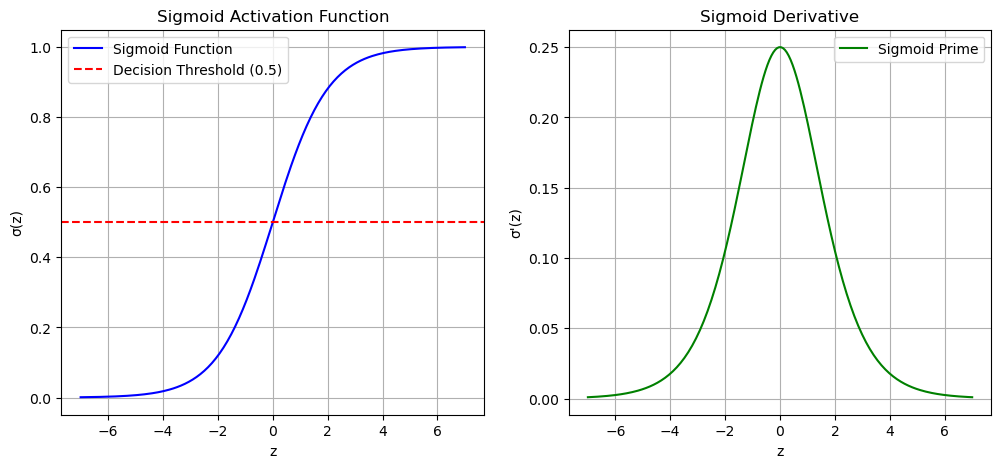

In [8]:
# Create an array of values for z
z = np.linspace(-7, 7, 200)  # Values from -7 to 7

# Calculate sigmoid and sigmoid prime values
s = sigmoid(z)
s_prime = sigmoid_prime(z)

# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the sigmoid function
ax1.plot(z, s, label="Sigmoid Function", color="b")
ax1.set_xlabel("z")
ax1.set_ylabel("σ(z)")
ax1.set_title("Sigmoid Activation Function")
ax1.grid()
ax1.axhline(0.5, color='r', linestyle='--', label="Decision Threshold (0.5)")
ax1.legend()

# Plot the sigmoid prime function
ax2.plot(z, s_prime, label="Sigmoid Prime", color="g")
ax2.set_xlabel("z")
ax2.set_ylabel("σ'(z)")
ax2.set_title("Sigmoid Derivative")
ax2.grid()
ax2.legend()

plt.show()

### 2.1 Defining the perceptron model

In [9]:
# The Perceptron model
def perceptron(X, W, b):
    return sigmoid(np.dot(X, W) + b).flatten()

−(ylog(pred)+(1−y)log(1−pred))

The function `binary_cross_entropy(y, y_pred)` computes the binary cross-entropy loss. This loss function is commonly used in binary classification tasks.


**Explanation:**
- When `y` is 1, the loss component is `-log(y_pred)`. This term measures how well the model's predicted probability aligns with the actual positive instance.
- When `y` is 0, the loss component is `-log(1 - y_pred)`. This term evaluates the model's prediction for negative instances.

The negative sign is used to convert the problem into a minimization task, where the goal is to minimize the cross-entropy loss. In other words, the loss penalizes models that are highly confident but wrong (i.e., predicting close to 1 when `y` is 0 or predicting close to 0 when `y` is 1).

In [10]:
def binary_cross_entropy(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

### 2.3 Define gradients

#### Derivation of Gradients for Binary Cross-Entropy Loss

We want to derive the gradients for the binary cross-entropy loss with respect to the bias term (gradient_b) and the weights (gradient_W). The binary cross-entropy loss is given by:

L(W) = -[1/N * Σ (y * log(y_pred) + (1 - y) * log(1 - y_pred))]

Where:
- N is the number of data points.
- y is the true binary label (0 or 1).
- y_pred is the predicted value.

**Derivation for gradient_b:**


1. Start with the binary cross-entropy loss:
   L(W) = -[1/N * Σ (y * log(y_pred) + (1 - y) * log(1 - y_pred))]

2. Take the derivative with respect to the bias (b):
   ∂L/∂b = -[1/N * Σ (y_pred - y)]

3. Simplify and divide by N to get the gradient for the bias:
   gradient_b = (1/N) * Σ (y_pred - y)

**Derivation for gradient_W:**

1. Start with the binary cross-entropy loss:
   L(W) = -[1/N * Σ (y * log(y_pred) + (1 - y) * log(1 - y_pred))]

2. Take the derivative with respect to the weights (W):
   ∂L/∂W = -[1/N * Σ (X^T * (y_pred - y))]

3. Simplify and divide by N to get the gradient for the weights:
   gradient_W = (1/N) * X^T * (y_pred - y)



In [11]:

def gradient_b(y_pred, y):
    N= y.shape[0] # y.len()
    y = y.shape[0]
    return (1. /N) * np.sum(y_pred - y)  # * 1

def gradient_W(y_pred, y, X):
    N= X.shape[0] # X.len()
    Y = (y_pred - y).reshape((y.shape[0], 1)) #to make sure it's one column and N lines
    return (1. / N)* np.dot(np.transpose(X), Y)

### 2.4 Train the Perceptron

In [12]:
# Initialize parameters
b= np.random.normal(0,1)
W = np.random.normal(0,1 ,size = (X_train_scaled.shape[1],1))

 `X_train_scaled.shape[1]` This ensures that the weight matrix `W` has the correct shape to match the input features => determines the number of columns in the weight matrix

In [13]:
# Hyperparameters
lr = 0.00000001
epochs = 10000
train_loss_list = []
val_loss_list = []

In [14]:
# Forward pass --->
y_pred = perceptron(X_train_scaled,W,b)
y_pred

array([0.57205174, 0.77149676, 0.22317481, ..., 0.59261044, 0.73645162,
       0.622614  ])

In [15]:
# Compute gradients
grad_b = gradient_b(y_pred, y_train_)
grad_W = gradient_W(y_pred, y_train_, X_train_scaled)

In [16]:
# training
for i in range(epochs):
    y_pred = perceptron(X_train_scaled,W,b)
    grad_b = gradient_b(y_pred, y_train_)
    grad_W = gradient_W(y_pred, y_train_ , X_train_scaled)
    # update parameters
    b -= lr * grad_b
    W -= lr * grad_W
    # Compute and record training loss
    train_loss = binary_cross_entropy(y_train_.flatten(), y_pred)
    train_loss_list.append(train_loss)
    
    #Forward pass for the validation set
    y_pred_val = perceptron(X_val_scaled, W, b)

    # Compute and record validation loss
    val_loss = binary_cross_entropy(y_val, y_pred_val.flatten())
    val_loss_list.append(val_loss)
    if i % 1000 == 0:
        print(f"Epoch{i} - Training Loss: {train_loss} - Validation Loss: {val_loss}")

    


Epoch0 - Training Loss: 0.8137271059846815 - Validation Loss: 0.7940264635246032
Epoch1000 - Training Loss: 0.8086226710849841 - Validation Loss: 0.7885192368321912
Epoch2000 - Training Loss: 0.8040818439760036 - Validation Loss: 0.7835796718807397
Epoch3000 - Training Loss: 0.8001062359675866 - Validation Loss: 0.7792096506160623
Epoch4000 - Training Loss: 0.7966970595920148 - Validation Loss: 0.7754106476209884
Epoch5000 - Training Loss: 0.7938551328083934 - Validation Loss: 0.7721837328882871
Epoch6000 - Training Loss: 0.791580884050047 - Validation Loss: 0.7695295754801798
Epoch7000 - Training Loss: 0.7898743580400148 - Validation Loss: 0.7674484480097477
Epoch8000 - Training Loss: 0.7887352222994439 - Validation Loss: 0.7659402318785677
Epoch9000 - Training Loss: 0.7881627742743947 - Validation Loss: 0.7650044232049081


### 2.5 Visualization of the loss

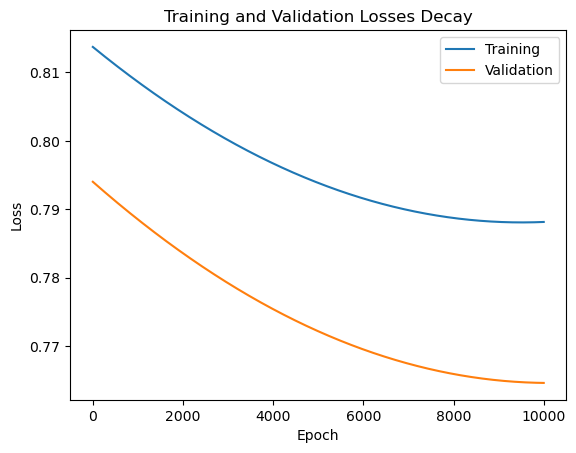

In [17]:
plt.figure()
plt.plot(np.arange(epochs), train_loss_list)
plt.plot(np.arange(epochs), val_loss_list)
plt.title('Training and Validation Losses Decay')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

# 3. Model Evaluation

1. Compute the predictions on the testing set using the trained classifier.
2. Compute the accuracy score of the predictions, then compute the precision, the recall and the F1 scores.
How well is our model performing?

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute predictions on the testing set
y_pred= perceptron(X_test_scaled, W, b)
# Assuming y_pred contains your model's continuous predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)



In [19]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.618
Precision: 0.6126126126126126
Recall: 0.650199203187251
F1 Score: 0.6308465403942791


Our model is showing moderate performance. It has an accuracy, precision, recall, and F1 score above 0.5, indicating that it can make predictions better than 'random chance'. However, there is still room for improvement.